## ref:https://github.com/mindee/doctr/discussions/1283

In [22]:
import random
import time

import requests
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.geometry import rotate_image

In [53]:
doc = DocumentFile.from_images(["./test_image.png", "./test_image2.png"]) # * 20) # './doc_neg_90.jpg', "./doc_90.jpg", "./doc.jpg",

1647.8701877593994


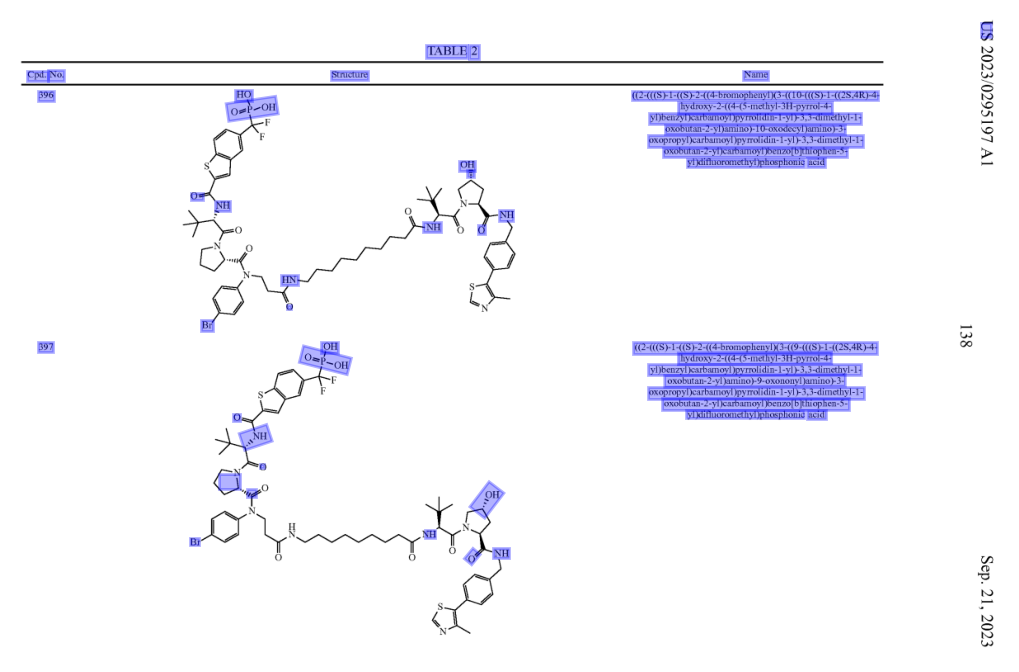

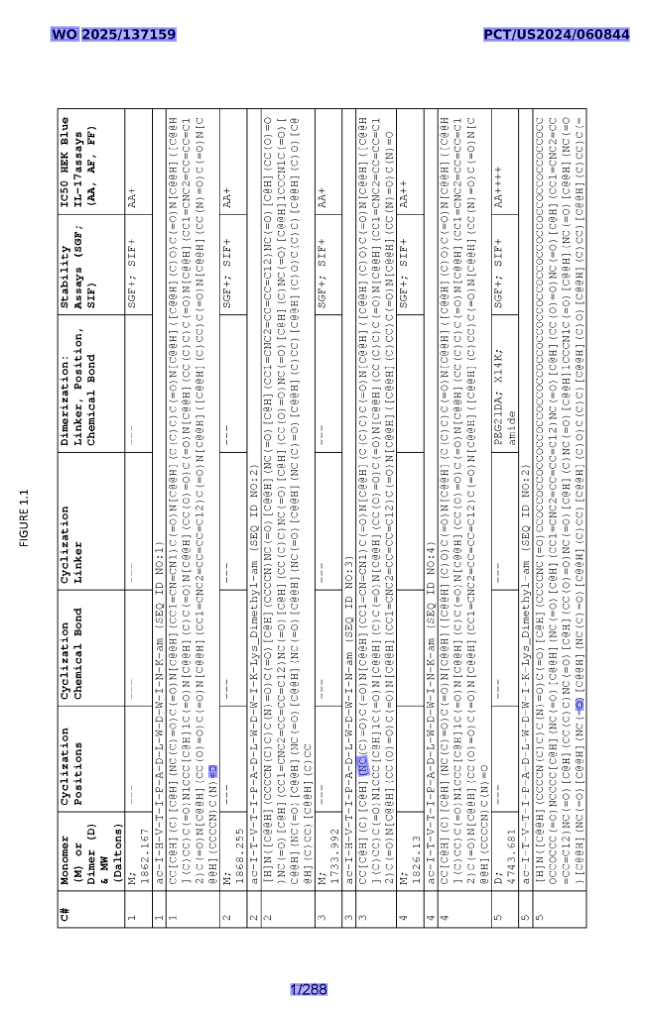

orientation: -90
orientation: 0


In [57]:
##
# model = ocr_predictor(
#     det_arch="db_resnet50_rotation",
#     reco_arch="parseq",
#     pretrained=True,
#     det_bs=8,
#     reco_bs=1024,
#     assume_straight_pages=False,
#     straighten_pages=True,
#     detect_orientation=True,
# ).cuda().half()  # uncomment if you have a GPU

start = time.time()
model = ocr_predictor(
    det_arch="db_resnet50",  # 标准 DB 模型
    # reco_arch="parseq",
    reco_arch="master",
    pretrained=True,
    det_bs=8,
    reco_bs=1024,
    assume_straight_pages=False,  # 不假设页面是直的
    straighten_pages=True,        # 自动矫正页面方向
    detect_orientation=True,      # 检测页面方向
).cuda().half()  # 如果使用 GPU

result = model(doc)
print(time.time() - start)
result.show()
json_res = result.export()

for res in zip(json_res["pages"]):
    # orientation = res["orientation"]["value"]
    orientation = res[0]["orientation"]["value"]
    print(f"orientation: {orientation}")

The bad deteion in doctor leads to bad documentation orientation detection.